# **Machine Learning Using Graient Descent Algorithm** : math 

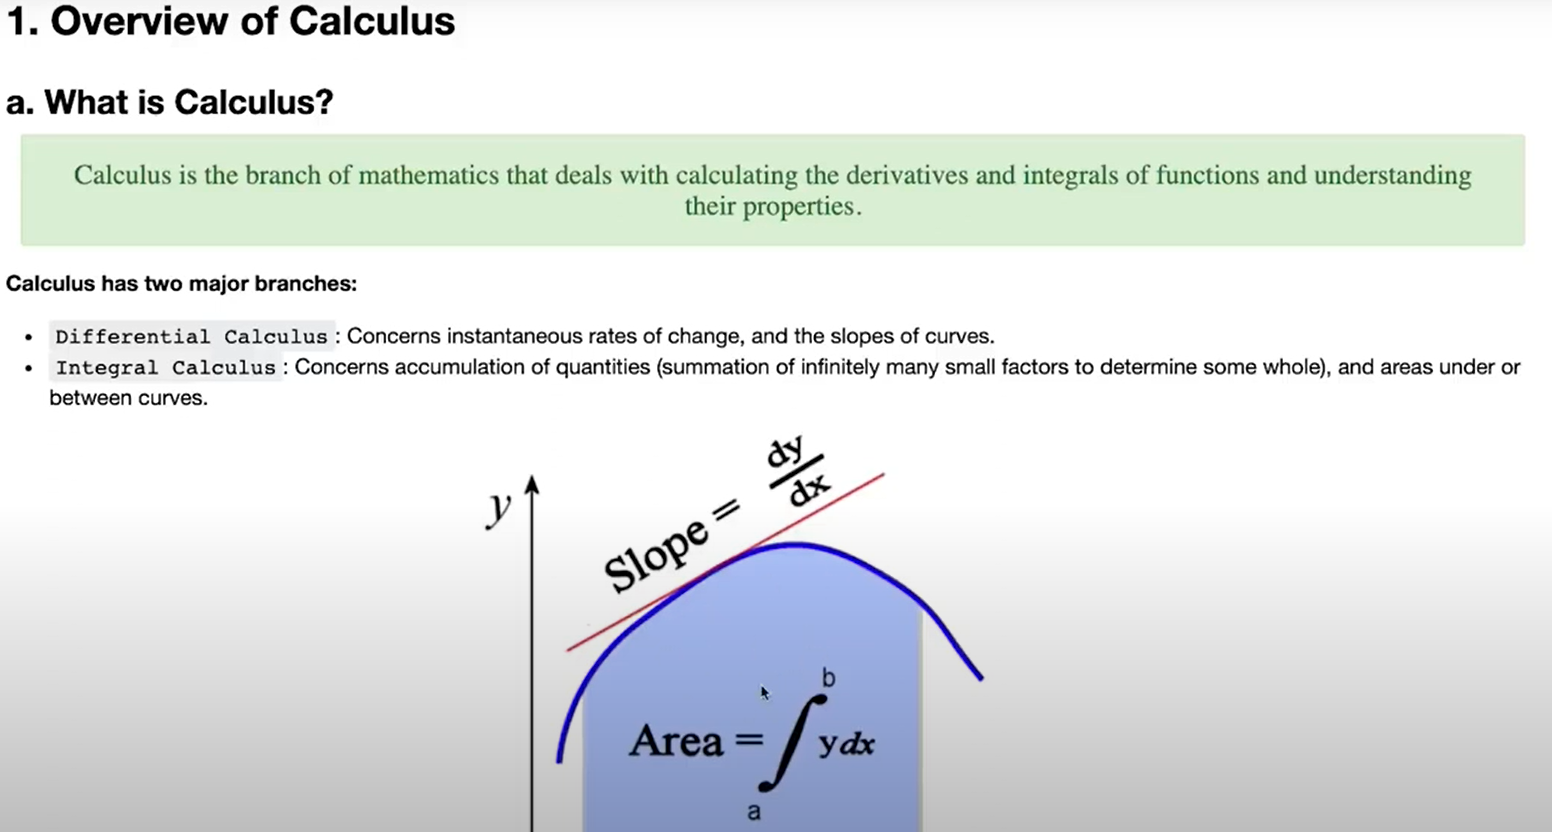

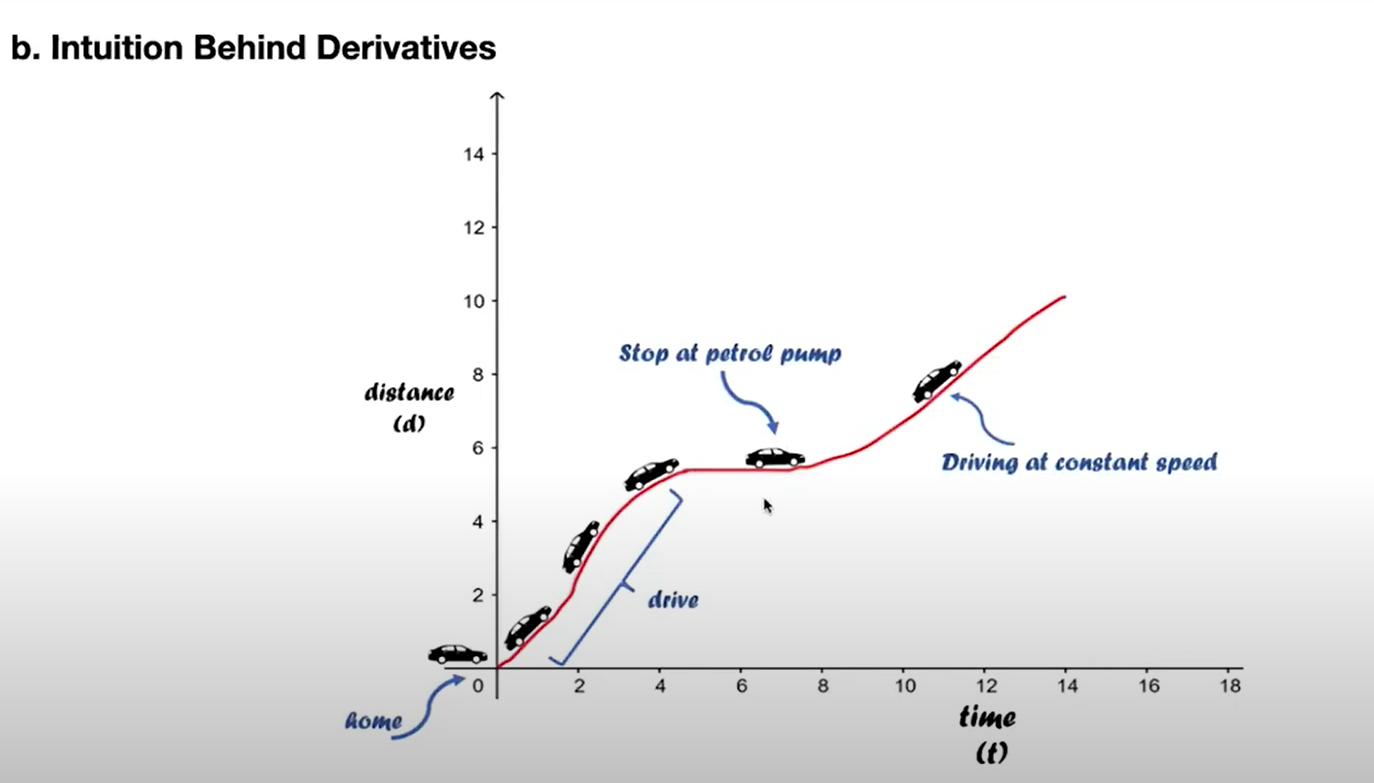

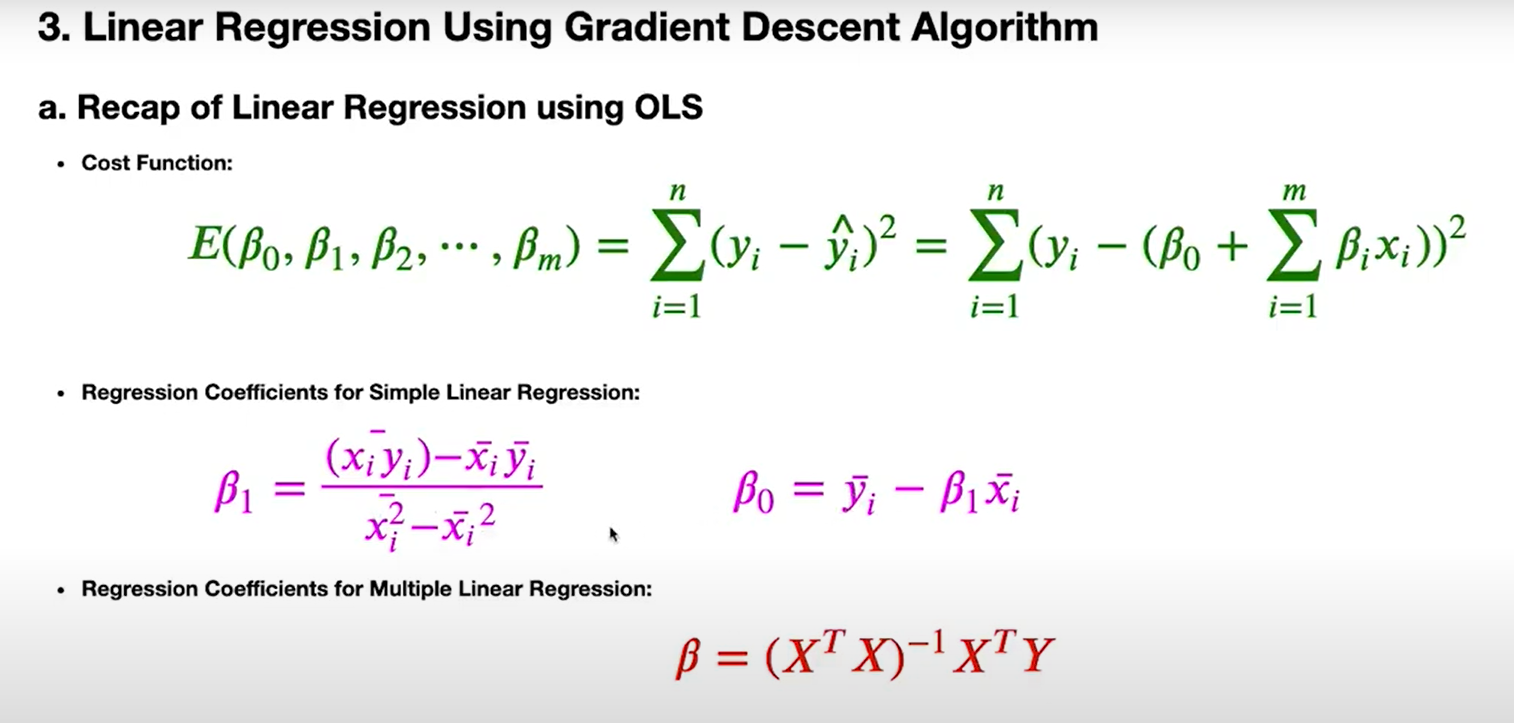

**Practice:**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from numpy import set_printoptions

df = pd.read_csv(r"D:\Codes\MachineLearning\Datasets\study-hours.csv")

scaler = preprocessing.MinMaxScaler(feature_range=(0, 4))

rescaled = scaler.fit_transform(df[["Scores"]])
# why this line is not working.
# set_printoptions(precision=2)

df["GPA"] = rescaled

print(df)

    Hours  Scores   GPA
0     2.5      21  0.41
1     5.1      47  1.61
2     3.2      27  0.69
3     8.5      75  2.90
4     3.5      30  0.83
..    ...     ...   ...
91    5.8      60  2.21
92    4.4      44  1.47
93    6.1      63  2.34
94    3.7      37  1.15
95    8.0      84  3.31

[96 rows x 3 columns]


In [28]:
# df.isnull().values.any()
# df.isna().sum()

df.isnull().sum()

Hours     0
Scores    0
GPA       0
dtype: int64

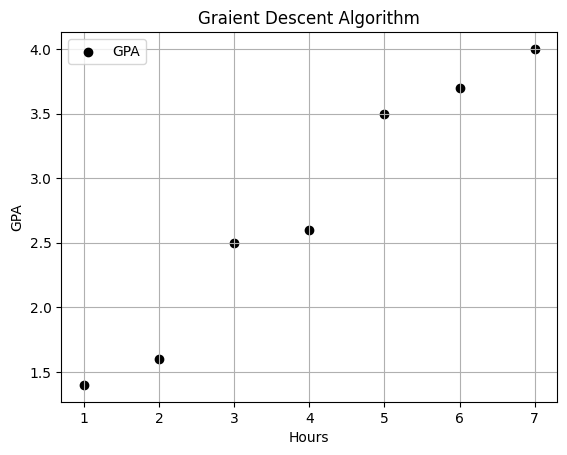

In [29]:
newdf = pd.read_csv(r"D:\Codes\MachineLearning\Datasets\study-gpa.csv")
x = newdf[["study_hours"]]
y = newdf["gpa"]

plt.scatter(x,y,color="black", label="GPA")
plt.xlabel("Hours")
plt.ylabel("GPA")
plt.title("Graient Descent Algorithm")
plt.grid()
plt.legend()
plt.show()


In [30]:
print(df.columns)

testValues = df[["Hours"]].rename(columns={"Hours": "study_hours"})
print(testValues.columns)


from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x, y)

a = lr.intercept_
b = lr.coef_[0]



Index(['Hours', 'Scores', 'GPA'], dtype='object')
Index(['study_hours'], dtype='object')


In [31]:
# def calculateForEachPoint():
#     arr = []
#     for x in df["Hours"]:
#         pred = lr.predict(np.array([[x]]))  
#         arr.append(pred[0])  
#     return np.array(arr)

# PredictedValue = calculateForEachPoint()



PredictedValue = lr.predict(testValues[["study_hours"]])

print("Test Value: ",testValues)
print("Predicted Value: ", PredictedValue)

Test Value:      study_hours
0           2.5
1           5.1
2           3.2
3           8.5
4           3.5
..          ...
91          5.8
92          4.4
93          6.1
94          3.7
95          8.0

[96 rows x 1 columns]
Predicted Value:  [2.06 3.27 2.39 4.85 2.52 1.6  5.17 3.45 4.75 2.15 4.47 3.64 2.99 2.43
 1.41 5.03 2.06 1.78 3.73 4.34 2.15 3.13 2.66 4.1  4.52 2.85 5.31 3.59
 1.97 3.08 1.64 5.08 3.78 4.66 2.71 1.92 4.2  3.82 3.36 2.94 1.74 5.26
 4.01 2.62 4.29 2.8  4.61 2.34 1.5  3.55 2.2  4.57 3.96 2.57 2.01 3.04
 4.8  1.69 3.31 3.87 4.43 5.22 2.48 1.88 3.41 4.71 1.55 5.36 4.06 4.38
 2.9  3.92 4.94 2.29 2.25 1.46 5.4  3.18 3.5  4.89 2.11 4.24 1.36 3.69
 2.76 3.22 4.06 1.83 2.29 4.15 5.45 3.59 2.94 3.73 2.62 4.61]


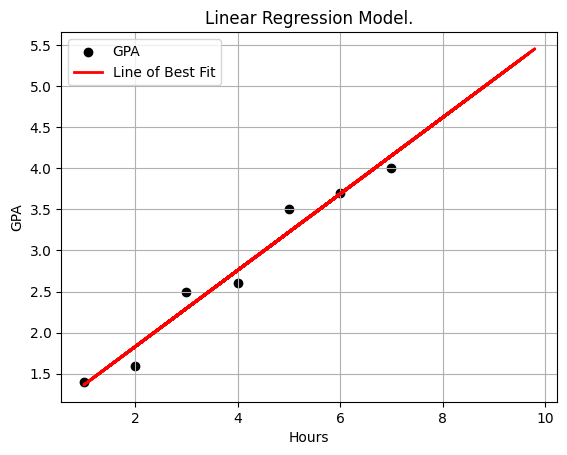

In [32]:
plt.scatter(x,y,color="black", label="GPA")
plt.plot(testValues,PredictedValue, color="red", linewidth=2, label="Line of Best Fit")
plt.xlabel("Hours")
plt.ylabel("GPA")
plt.title("Linear Regression Model.")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:


ybar = np.mean(y)
yhat = a + b * x["study_hours"]  # x["study_hours"] is a Series

mae = (np.sum(np.abs(y - yhat))) / len(y) #
mse = (np.sum((y - yhat)**2)) / len(y)
rmse = np.sqrt((np.sum((y - yhat)**2)) / len(y))
sse = np.sum((y - yhat)**2)
sst = np.sum((y - ybar)**2)
r2 = 1 - sse/sst

# ==================================================================
# MAE: Mean Absolute Errors
# MSE: Mean Squared Error
# RMSE: Root Mean Squared Error
# SSE: S um of Squared Errors
# SST: Total Sum of Squares
# R2: R-squared (also known as the coefficient of determination)
# ==================================================================

print(f"MAE: ", mae)
print(f"MSE: ", mse)
print(f"RMSE: ", rmse)
print(f"R2: ", r2)

MAE:  0.15306122448979598
MSE:  0.031632653061224494
RMSE:  0.1778557085426962
R2:  0.9646118721461188


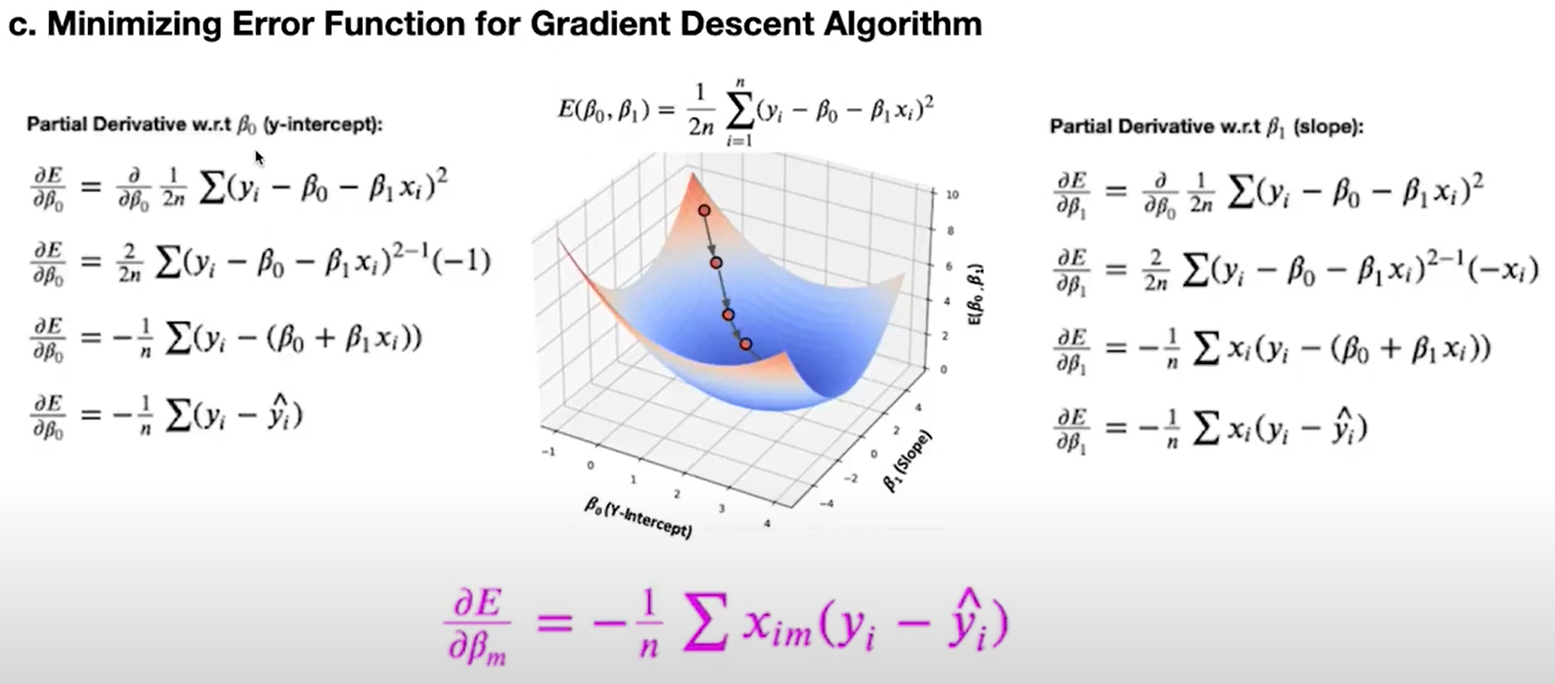